In [1]:
%reset -f

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Text(0, 0.5, 'Number of Days')

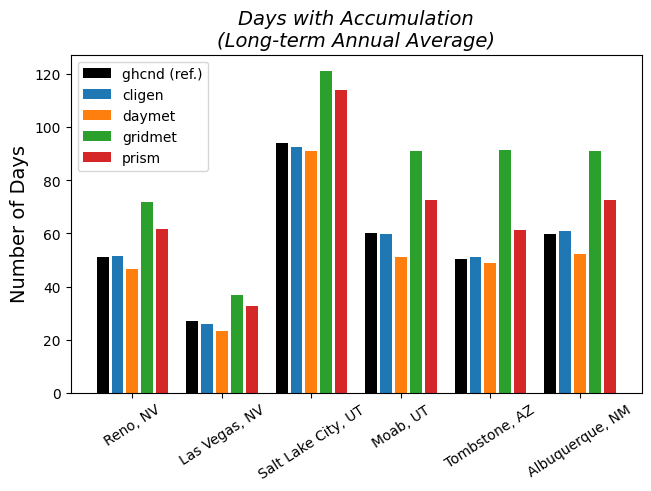

In [3]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'


def chi2_distance(A, B):
  chi = 0.5 * np.sum([((a - b)**2) / (a + b)
                    for (a, b) in zip(A, B)])
  return chi

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'tb', 'ab']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', 'Moab, UT', 'Tombstone, AZ', 'Albuquerque, NM']

fig, ax = plt.subplots(layout='constrained')
plt.rcParams['axes.grid'] = True

#ghcnd, cligen, daymet, gridmet,
data_years = [40, 40, 34, 35, 33]
j = 0
for i in range(len(labels)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_ghcnd.csv' in f:
      ghcnd_file = f
    elif '_cligen.csv' in f:
      cligen_file = f
    elif '_daymet.csv' in f:
      daymet_file = f
    elif '_gridmet.csv' in f:
      gridmet_file = f
    elif '_prism.csv' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    prism_p = p

  color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
  ax.bar([j+1+(i*5), j+2+(i*5), j+3+(i*5), j+4+(i*5), j+5+(i*5)], [len(ghcnd_p)/data_years[0], len(cligen_p)/data_years[1], len(daymet_p)/data_years[2], len(gridmet_p)/data_years[3], len(ghcnd_p)/data_years[4]], color=color)

  j += 1

  ax.set_xticks([3, 9, 15, 21, 27, 33])
  ax.set_xticklabels(labels, rotation=33, ha='center')
  ax.grid(False)
  ax.set_ylabel('Days with Accumulation\n(Long-term Annual Average)')



ghcnd, = ax.bar([0], [0], width=0, color=color[0])
cligen, = ax.bar([0], [0], width=0, color=color[1])
daymet, = ax.bar([0], [0], width=0, color=color[2])
gridmet, = ax.bar([0], [0], width=0, color=color[3])
prism, = ax.bar([0], [0], width=0, color=color[4])
legend_labels = ['ghcnd (ref.)', 'cligen', 'daymet', 'gridmet', 'prism']
ax.legend(handles=[ghcnd, cligen, daymet, gridmet, prism], labels=legend_labels)
ax.set_xticks([3, 9, 15, 21, 27, 33])
ax.set_xticklabels(labels, rotation=33, ha='center')
ax.grid(False)
ax.set_title('Days with Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
ax.set_ylabel('Number of Days', size=14, fontstyle='normal')


ghcnd, = ax.bar([0], [0], width=0, color=color[0])
cligen, = ax.bar([0], [0], width=0, color=color[1])
daymet, = ax.bar([0], [0], width=0, color=color[2])
gridmet, = ax.bar([0], [0], width=0, color=color[3])
prism, = ax.bar([0], [0], width=0, color=color[4])
legend_labels = ['ghcnd (ref.)', 'cligen', 'daymet', 'gridmet', 'prism']
ax.legend(handles=[ghcnd, cligen, daymet, gridmet, prism], labels=legend_labels)
ax.set_xticks([3, 9, 15, 21, 27, 33])
ax.set_xticklabels(labels, rotation=33, ha='center')
ax.grid(False)
ax.set_title('Days with Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
ax.set_ylabel('Number of Days', size=14, fontstyle='normal')



Text(0, 0.5, 'Accumulation\n(mm)')

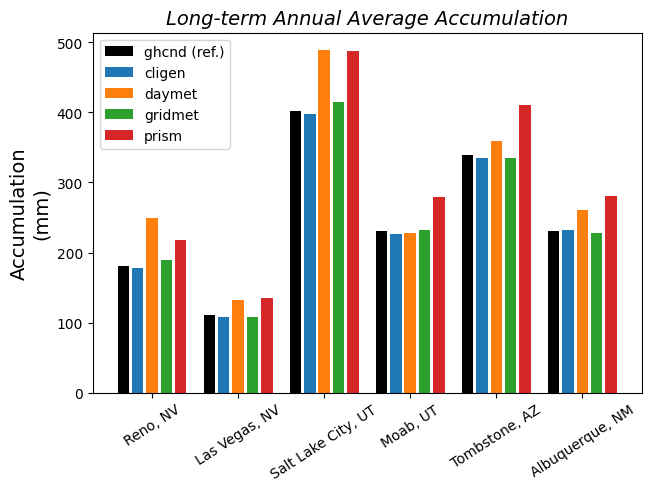

In [ ]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'


def chi2_distance(A, B):
  chi = 0.5 * np.sum([((a - b)**2) / (a + b)
                    for (a, b) in zip(A, B)])
  return chi

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'tb', 'ab']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', 'Moab, UT', 'Tombstone, AZ', 'Albuquerque, NM']

fig, ax = plt.subplots(layout='constrained')
plt.rcParams['axes.grid'] = True

#ghcnd, cligen, daymet, gridmet,
data_years = [40, 40, 34, 35, 33]
j = 0
for i in range(len(labels)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_ghcnd.csv' in f:
      ghcnd_file = f
    elif '_cligen.csv' in f:
      cligen_file = f
    elif '_daymet.csv' in f:
      daymet_file = f
    elif '_gridmet.csv' in f:
      gridmet_file = f
    elif '_prism.csv' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    prism_p = p

  color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
  ax.bar([j+1+(i*5), j+2+(i*5), j+3+(i*5), j+4+(i*5), j+5+(i*5)], [sum(ghcnd_p)/data_years[0], sum(cligen_p)/data_years[1], sum(daymet_p)/data_years[2], sum(gridmet_p)/data_years[3], sum(ghcnd_p)/data_years[4]], color=color)

  j += 1


ghcnd, = ax.bar([0], [0], width=0, color=color[0])
cligen, = ax.bar([0], [0], width=0, color=color[1])
daymet, = ax.bar([0], [0], width=0, color=color[2])
gridmet, = ax.bar([0], [0], width=0, color=color[3])
prism, = ax.bar([0], [0], width=0, color=color[4])
legend_labels = ['ghcnd (ref.)', 'cligen', 'daymet', 'gridmet', 'prism']
ax.legend(handles=[ghcnd, cligen, daymet, gridmet, prism], labels=legend_labels)
ax.set_xticks([3, 9, 15, 21, 27, 33])
ax.set_xticklabels(labels, rotation=33, ha='center')
ax.grid(False)
ax.set_title('Long-term Annual Average Accumulation', size=14, fontstyle='oblique')
ax.set_ylabel('Accumulation\n(mm)', size=14, fontstyle='normal')





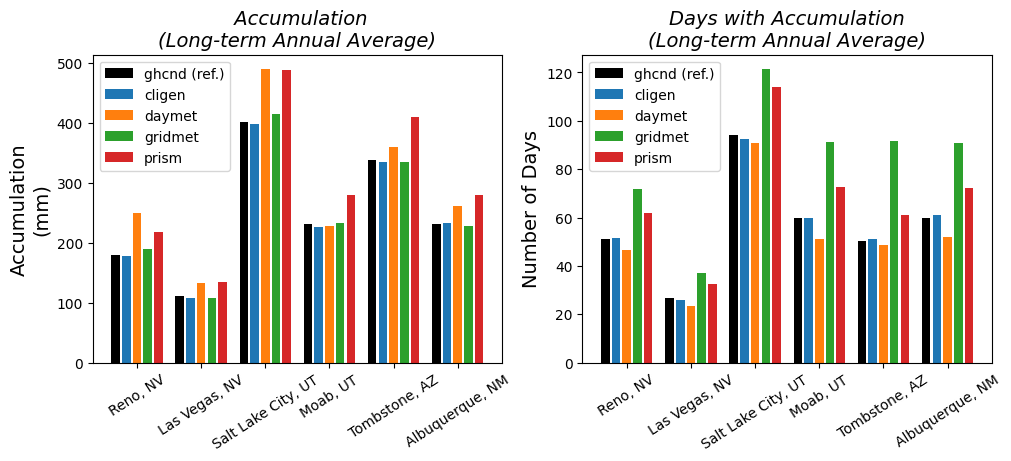

In [5]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_AnnualP_WetD.jpg'

def chi2_distance(A, B):
  chi = 0.5 * np.sum([((a - b)**2) / (a + b)
                    for (a, b) in zip(A, B)])
  return chi

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'tb', 'ab']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', 'Moab, UT', 'Tombstone, AZ', 'Albuquerque, NM']

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4.5))
plt.rcParams['axes.grid'] = True

#ghcnd, cligen, daymet, gridmet,

data_years = [40, 40, 34, 35, 33]

for ax_i in range(2):
  j = 0
  for i in range(len(labels)):

    lvlOneFolder = lvlOneFolders[i]

    files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

    for f in files:
      if '_ghcnd.csv' in f:
        ghcnd_file = f
      elif '_cligen.csv' in f:
        cligen_file = f
      elif '_daymet.csv' in f:
        daymet_file = f
      elif '_gridmet.csv' in f:
        gridmet_file = f
      elif '_prism.csv' in f:
        prism_file = f
      else:
        pass

    with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
      ghcnd_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
      lines = f.readlines()
      p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
      cligen_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      daymet_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      gridmet_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      prism_p = p

    color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    if ax_i == 0:
      ax[0].bar([j+1+(i*5), j+2+(i*5), j+3+(i*5), j+4+(i*5), j+5+(i*5)], [sum(ghcnd_p)/data_years[0], sum(cligen_p)/data_years[1], sum(daymet_p)/data_years[2], sum(gridmet_p)/data_years[3], sum(ghcnd_p)/data_years[4]], color=color)
      ax[0].set_xticks([3, 9, 15, 21, 27, 33])
      ax[0].set_xticklabels(labels, rotation=33, ha='center')
      ax[0].grid(False)
      ax[0].set_title(' Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
      ax[0].set_ylabel('Accumulation\n(mm)', size=14, fontstyle='normal')

    else:
      ax[1].bar([j+1+(i*5), j+2+(i*5), j+3+(i*5), j+4+(i*5), j+5+(i*5)], [len(ghcnd_p)/data_years[0], len(cligen_p)/data_years[1], len(daymet_p)/data_years[2], len(gridmet_p)/data_years[3], len(ghcnd_p)/data_years[4]], color=color)
      ax[1].set_xticks([3, 9, 15, 21, 27, 33])
      ax[1].set_xticklabels(labels, rotation=33, ha='center')
      ax[1].grid(False)
      ax[1].set_title('Days with Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
      ax[1].set_ylabel('Number of Days', size=14, fontstyle='normal')

    j += 1

  ghcnd, = ax[ax_i].bar([0], [0], width=0, color=color[0])
  cligen, = ax[ax_i].bar([0], [0], width=0, color=color[1])
  daymet, = ax[ax_i].bar([0], [0], width=0, color=color[2])
  gridmet, = ax[ax_i].bar([0], [0], width=0, color=color[3])
  prism, = ax[ax_i].bar([0], [0], width=0, color=color[4])
  legend_labels = ['ghcnd (ref.)', 'cligen', 'daymet', 'gridmet', 'prism']
  ax[ax_i].legend(handles=[ghcnd, cligen, daymet, gridmet, prism], labels=legend_labels, loc='upper left')



fig.savefig(saveFILE, dpi=600, bbox_inches='tight')


